<a href="https://colab.research.google.com/github/umesh03B/ma22c048_2023_PL/blob/main/Assignment/Assignment_14/Ovarian_cancer_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I coundn't find the actual dataset mentioned in the book, so i used the sklearn dataset to perform the following tasks**

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Extract features (X) and labels (y)
X = data.data  # Features
y = data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=30)  # Specify the number of components you want
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Now you can proceed with training your machine learning model on this data.


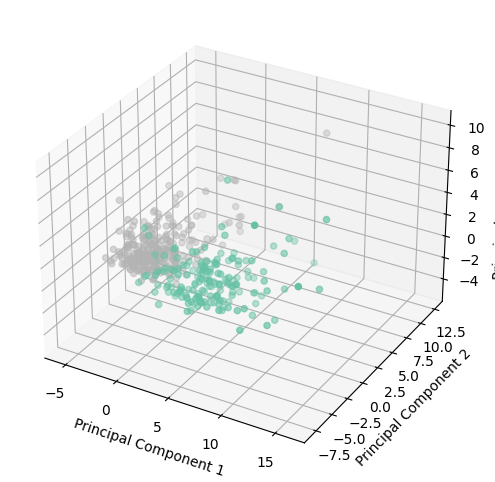

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming you've already performed PCA and have X_train_pca as your PCA-transformed data
# Replace this with your actual data

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the first three principal components
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap=sns.color_palette("Set2", as_cmap=True))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()


Number of dimensions needed to keep 95% of the variance: 10
Percentage of variance retained with 3 dimensions: 0.7278430734090061
Percentage of variance lost when reducing from 4000 to 3 dimensions: 0.2721569265909939


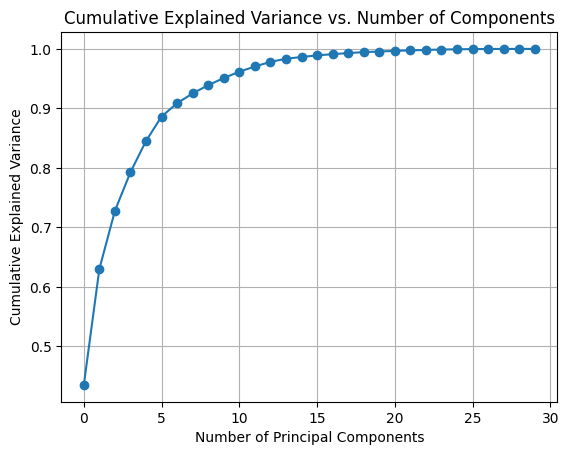

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Get the explained variance ratios
explained_var = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_var = np.cumsum(explained_var)

# Plot the cumulative explained variance
plt.plot(cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)

# Find the number of dimensions needed for 95% variance
n_components_95 = np.where(cumulative_var >= 0.95)[0][0] + 1

# Print the results
print("Number of dimensions needed to keep 95% of the variance:", n_components_95)
print("Percentage of variance retained with 3 dimensions:", cumulative_var[2])
print("Percentage of variance lost when reducing from 4000 to 3 dimensions:", 1 - cumulative_var[2])

# Show the plot
plt.show()


In [4]:
X_train.shape

(455, 30)